# Netflix Recommendation System using Python


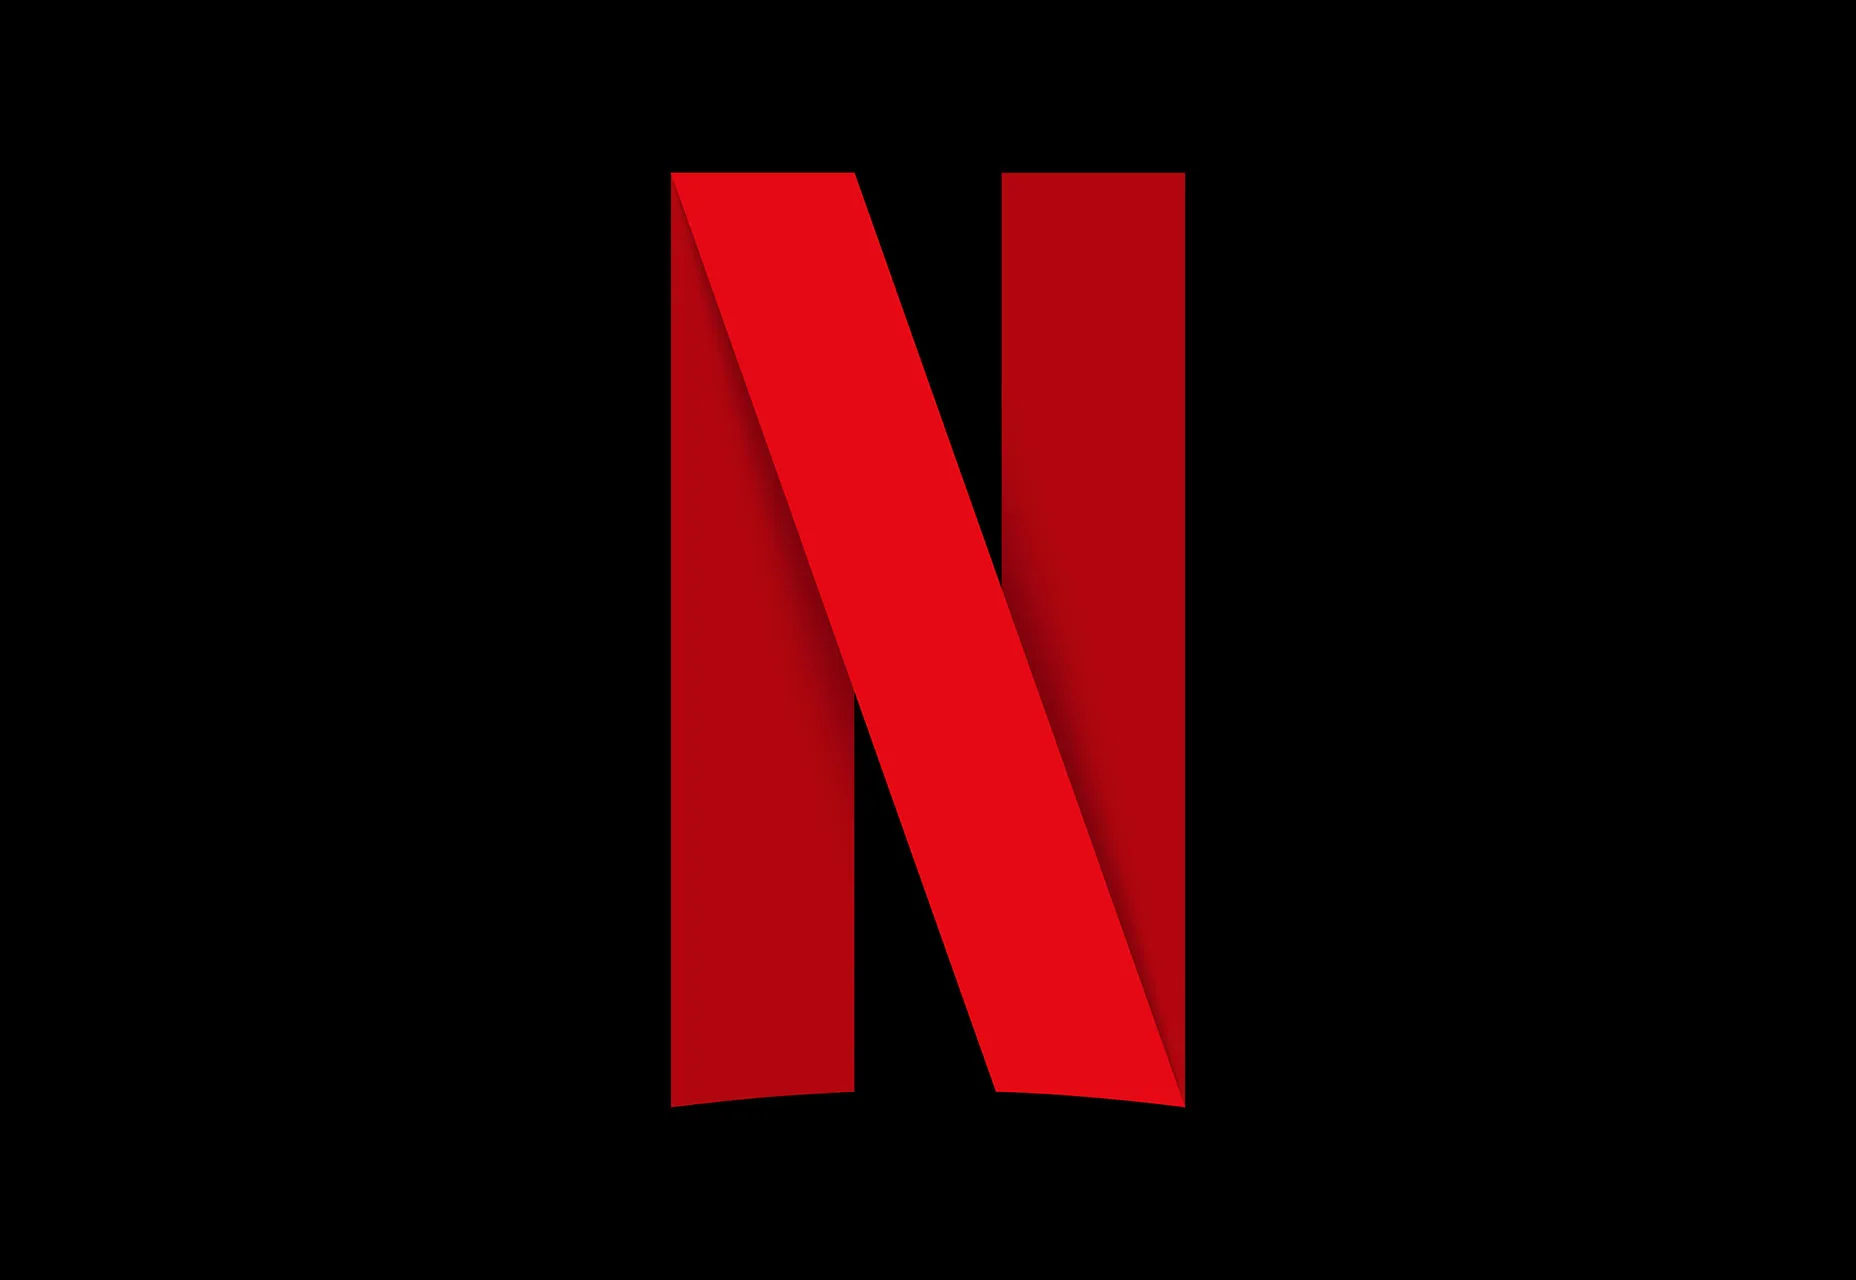

In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv("D:/netflixData.csv")


In [5]:
print(data.head())

                                Show Id                          Title  \
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well   
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   
3  b6611af0-f53c-4a08-9ffa-9716dc57eb9c                       #blackAF   
4  7f2d4170-bab8-4d75-adc2-197f7124c070               #cats_the_mewvie   

                                         Description  \
0  This docuseries takes a deep dive into the luc...   
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   
3  Kenya Barris and his family navigate relations...   
4  This pawesome documentary explores how our fel...   

                      Director  \
0                          NaN   
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   
3                          NaN   
4             Michael Margolis   

             

In [6]:
print(data.isnull().sum())

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64


In [7]:
data = data[["Title", "Description", "Content Type", "Genres"]]
print(data.head())

                           Title  \
0                       (Un)Well   
1                         #Alive   
2  #AnneFrank - Parallel Stories   
3                       #blackAF   
4               #cats_the_mewvie   

                                         Description Content Type  \
0  This docuseries takes a deep dive into the luc...      TV Show   
1  As a grisly virus rampages a city, a lone man ...        Movie   
2  Through her diary, Anne Frank's story is retol...        Movie   
3  Kenya Barris and his family navigate relations...      TV Show   
4  This pawesome documentary explores how our fel...        Movie   

                                           Genres  
0                                      Reality TV  
1  Horror Movies, International Movies, Thrillers  
2             Documentaries, International Movies  
3                                     TV Comedies  
4             Documentaries, International Movies  


In [8]:
data = data.dropna()

In [9]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stopword=set(stopwords.words('english'))


In [11]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Title"] = data["Title"].apply(clean)

In [12]:
print(data.Title.sample(10))

1458           el chapo
1615              ferri
1080     concret cowboy
4374               spin
5116            perfect
2205          hadnt met
4135     secret success
2049    high  low worst
1513    eric ldles dick
2330           jailbird
Name: Title, dtype: object


In [16]:
# feature = data["Genres"].tolist()
# tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
# tfidf_matrix = tfidf.fit_transform(feature)
# similarity = cosine_similarity(tfidf_matrix)

In [14]:
print(data["Genres"].isnull().sum())


0


In [15]:
# replace missing values with an empty string
data["Genres"].fillna("", inplace=True)

# create tf-idf matrix
tfidf = text.TfidfVectorizer(input="content", stop_words="english")
tfidf_matrix = tfidf.fit_transform(data["Genres"])

# calculate cosine similarity
similarity = cosine_similarity(tfidf_matrix)


In [17]:
indices = pd.Series(data.index, 
                    index=data['Title']).drop_duplicates()

# Now here’s how to write a function to recommend Movies and TV shows on Netflix:



In [29]:
def netFlix_recommendation(input_title, similarity=similarity):
    try:
        index = indices[input_title]
    except KeyError:
        print("Title not found in dataset.")
        return
    
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    movieindices = [i[0] for i in similarity_scores]
    return data['Title'].iloc[movieindices]


In [64]:
print(netFlix_recommendation("#Selfie 9"))


No matches found.


In [65]:
def netflix_recommendation(title, similarity=similarity):
    try:
        # Try to find exact match of input title in data
        idx = data.loc[data['Title'] == title].index[0]
    except:
        # If not found, try to find a close match using fuzzy matching
        from fuzzywuzzy import fuzz
        ratios = data['Title'].apply(lambda x: fuzz.ratio(x.lower(), title.lower()))
        idx = ratios.sort_values(ascending=False).index[0]
    
    # Get the index of the movie in the similarity matrix
    index = indices[idx]
    
    # Compute similarity scores
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    
    # Get the indices of the top 10 similar movies
    movie_indices = [i[0] for i in similarity_scores]
    
    # Return the titles of the top 10 similar movies
    return data.iloc[movie_indices]['Title']

# Print out the data DataFrame to check formatting of movie titles
print(data['Title'])


0                           unwel
1                            aliv
2       annefrank  parallel stori
3                         blackaf
4                    catsthemewvi
                  ...            
5962                    الف مبروك
5963                 دفعة القاهرة
5964                         海的儿子
5965                      반드시 잡는다
5966           최강전사 미니특공대  영웅의 탄생
Name: Title, Length: 5967, dtype: object


In [67]:
print(netflix_recommendation("#Selfie 9"))


9             selfi
10           selfi 
12          jour en
32            state
46            idiot
128    man week end
136     perfect fit
186            time
243        ak vs ak
259           alelí
Name: Title, dtype: object


In [61]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [62]:
def netflix_recommendation(title, similarity=similarity):
    try:
        # Try to find exact match of input title in data
        idx = data.loc[data['Title'].str.lower() == title.lower()].index[0]
    except:
        # If not found, try to find a close match using fuzzy matching
        from fuzzywuzzy import fuzz
        ratios = data['Title'].apply(lambda x: fuzz.ratio(x.lower(), title.lower()))
        idx = ratios.sort_values(ascending=False).index[0]
    
    # Get the index of the movie in the similarity matrix
    index = indices[idx]
    
    # Compute similarity scores
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    
    # Get the indices of the top 10 similar movies
    movie_indices = [i[0] for i in similarity_scores]
    
    # Return the titles of the top 10 similar movies
    return data.iloc[movie_indices]


# Print out the data DataFrame to check formatting of movie titles
print(data['Title'])


0                           unwel
1                            aliv
2       annefrank  parallel stori
3                         blackaf
4                    catsthemewvi
                  ...            
5962                    الف مبروك
5963                 دفعة القاهرة
5964                         海的儿子
5965                      반드시 잡는다
5966           최강전사 미니특공대  영웅의 탄생
Name: Title, Length: 5967, dtype: object


In [63]:
#generalised the code to accept any string to return a movie

In [49]:
print(netflix_recommendation("#batman"))


            Title                                        Description  \
9           selfi  Two days before their final exams, three teen ...   
10         selfi   After a painful breakup, a trio of party-lovin...   
12        jour en  When a carefree bachelor is unexpectedly left ...   
32          state  Graduate students Krish and Ananya hope to win...   
46          idiot  While attending one of India's premier college...   
128  man week end  A career-focused woman convinces a colleague t...   
136   perfect fit  Sparks fly when a fashion blogger in Bali meet...   
186          time  When Tim learns that the men in his family can...   
243      ak vs ak  After a public spat with a movie star, a disgr...   
259         alelí  Mourning their father's death, a dysfunctional...   

    Content Type                                  Genres  
9          Movie  Comedies, Dramas, International Movies  
10         Movie  Comedies, Dramas, International Movies  
12         Movie  Comedies, Dr

In [50]:
def netflix_recommendation(title, similarity=similarity):
    try:
        # Try to find exact match of input title in data
        idx = data.loc[data['Title'].str.lower() == title.lower()].index[0]
    except:
        # If not found, try to find a close match using fuzzy matching
        from fuzzywuzzy import fuzz
        ratios = data['Title'].apply(lambda x: fuzz.ratio(x.lower(), title.lower()))
        idx = ratios.sort_values(ascending=False).index[0]
    
    # Get the index of the movie in the similarity matrix
    index = indices[idx]
    
    # Compute similarity scores
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    
    # Get the indices of the top 10 similar movies
    movie_indices = [i[0] for i in similarity_scores]
    
    # Return the top 10 similar movies with all their columns
    return data.iloc[movie_indices]

# Print out the data DataFrame to check formatting of movie titles
print(data['Title'])


0                           unwel
1                            aliv
2       annefrank  parallel stori
3                         blackaf
4                    catsthemewvi
                  ...            
5962                    الف مبروك
5963                 دفعة القاهرة
5964                         海的儿子
5965                      반드시 잡는다
5966           최강전사 미니특공대  영웅의 탄생
Name: Title, Length: 5967, dtype: object


In [66]:
print(netflix_recommendation("#will smith"))


150    stone fulham counti
195     across grace alley
201      adam song continu
298                 togeth
328               american
332           american son
437             etern gate
442    atlas shrug part ii
450     august osag counti
519                badland
Name: Title, dtype: object
